Case 1: Manhattan
Path: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (2, 4), (2, 5), (2, 6), (3, 6), (4, 6), (4, 5), (4, 4), (4, 3), (4, 2), (3, 2), (2, 2), (2, 1), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6)]
Cost: 28
Optimal: True
0 * * * * 1 0
1 1 1 1 * 1 0
* * * 1 * * *
* 1 * 1 1 1 *
* 1 * * * * *
* 1 1 1 1 1 1
* * * * * * 0

Case 2: Manhattan * 1.5
Path: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (2, 4), (2, 5), (2, 6), (3, 6), (4, 6), (4, 5), (4, 4), (4, 3), (4, 2), (3, 2), (2, 2), (2, 1), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6)]
Cost: 28
Optimal: True
0 * * * * 1 0
1 1 1 1 * 1 0
* * * 1 * * *
* 1 * 1 1 1 *
* 1 * * * * *
* 1 1 1 1 1 1
* * * * * * 0

Case 3: Inconsistent heuristic
Path: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (2, 4), (2, 5), (2, 6), (3, 6), (4, 6), (4, 5), (4, 4), (4, 3), (4, 2), (3, 2), (2, 2), (2, 1), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (6, 1), (6, 2)

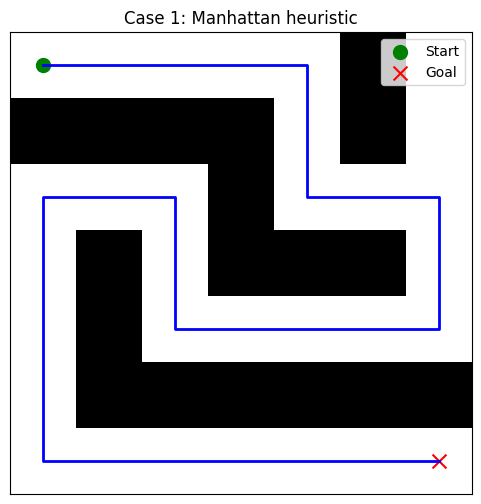

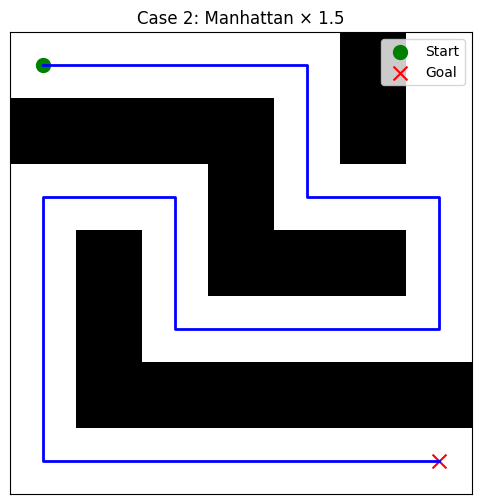

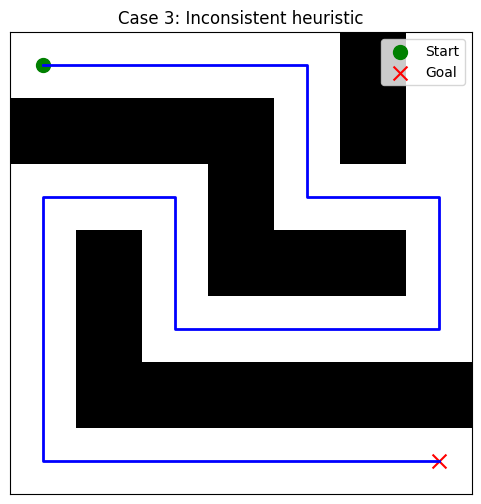

In [1]:
import heapq
import matplotlib.pyplot as plt
import numpy as np

# ---------- Helper Functions ----------
def manhattan(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def reconstruct_path(came_from, current):
    path = []
    while current in came_from:
        path.append(current)
        current = came_from[current]
    path.append(current)
    return path[::-1]

# ---------- A* Implementation ----------
def astar(maze, start, goal, heuristic_fn):
    rows, cols = len(maze), len(maze[0])
    open_set = []
    heapq.heappush(open_set, (0, start))
    
    came_from = {}
    g_score = {start: 0}
    f_score = {start: heuristic_fn(start, goal)}
    
    while open_set:
        _, current = heapq.heappop(open_set)
        
        if current == goal:
            return reconstruct_path(came_from, current), g_score[current]
        
        for dx, dy in [(0,1),(0,-1),(1,0),(-1,0)]:
            neighbor = (current[0]+dx, current[1]+dy)
            
            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols and maze[neighbor[0]][neighbor[1]] != 1:
                tentative_g = g_score[current] + 1
                if tentative_g < g_score.get(neighbor, float('inf')):
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g
                    f_score[neighbor] = tentative_g + heuristic_fn(neighbor, goal)
                    heapq.heappush(open_set, (f_score[neighbor], neighbor))
    return None, float('inf')

# ---------- Visualization ----------
def visualize_maze_text(maze, path, start, goal):
    maze_copy = [[maze[i][j] for j in range(len(maze[0]))] for i in range(len(maze))]
    for (x, y) in path:
        if (x, y) != start and (x, y) != goal:
            maze_copy[x][y] = '*'
    
    for row in maze_copy:
        print(" ".join(str(cell) for cell in row))
    print()

def visualize_maze_plot(maze, path, title="A* Path"):
    # Convert maze to numpy array for plotting
    maze_array = np.array(maze)

    # Create a color map:
    # 1 = wall (black), 0 = free (white)
    cmap = plt.cm.colors.ListedColormap(['white', 'black'])
    bounds = [0, 0.5, 1.5]
    norm = plt.cm.colors.BoundaryNorm(bounds, cmap.N)

    fig, ax = plt.subplots(figsize=(6,6))
    ax.imshow(maze_array, cmap=cmap, norm=norm)

    # Plot path
    if path:
        y_coords = [pos[0] for pos in path]
        x_coords = [pos[1] for pos in path]
        ax.plot(x_coords, y_coords, color="blue", linewidth=2)

    # Highlight start and goal
    start = path[0]
    goal = path[-1]
    ax.scatter(start[1], start[0], c="green", s=100, marker="o", label="Start")
    ax.scatter(goal[1], goal[0], c="red", s=100, marker="x", label="Goal")

    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.legend()
    plt.show()

# ---------- Define Maze ----------


maze = [
    [0, 0, 0, 0, 0, 1, 0],
    [1, 1, 1, 1, 0, 1, 0],
    [0, 0, 0, 1, 0, 0, 0],
    [0, 1, 0, 1, 1, 1, 0],
    [0, 1, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0]
]

start = (0, 0)  # Top-left corner
goal = (6, 6)   # Bottom-right corner


# Case 1 – Manhattan heuristic
path_case1, cost_case1 = astar(maze, start, goal, lambda a, b: manhattan(a,b))
print("Case 1: Manhattan")
print("Path:", path_case1)
print("Cost:", cost_case1)
print("Optimal:", True if cost_case1 == len(path_case1)-1 else False)
visualize_maze_text(maze, path_case1, start, goal)

# Case 2 – Manhattan * 1.5 heuristic
path_case2, cost_case2 = astar(maze, start, goal, lambda a, b: 1.5 * manhattan(a,b))
print("Case 2: Manhattan * 1.5")
print("Path:", path_case2)
print("Cost:", cost_case2)
print("Optimal:", True if cost_case2 == len(path_case2)-1 else False)
visualize_maze_text(maze, path_case2, start, goal)

# Case 3 – Inconsistent heuristic
def inconsistent_h(a, b):
    h = manhattan(a, b)
    # Add inconsistency at a few nodes to break triangle inequality
    if a in [(2,2), (4,4)]:
        return h + 4
    return h

path_case3, cost_case3 = astar(maze, start, goal, inconsistent_h)
print("Case 3: Inconsistent heuristic")
print("Path:", path_case3)
print("Cost:", cost_case3)
print("Optimal:", True if cost_case3 == len(path_case3)-1 else False)
visualize_maze_text(maze, path_case3, start, goal)

# Visualizations for all cases
visualize_maze_plot(maze, path_case1, "Case 1: Manhattan heuristic")
visualize_maze_plot(maze, path_case2, "Case 2: Manhattan × 1.5")
visualize_maze_plot(maze, path_case3, "Case 3: Inconsistent heuristic")